In [174]:
# Импортируем необходимые библиотеки
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Читаем файл с данными, используя разделитель ';'
df = pd.read_csv('./bank-additional-full.csv', sep=';')
# Выводим первые 5 строк данных
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,p,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [175]:
# Генерация описательных статистик для данных
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [176]:
# Считаем количество пропущенных значений в каждом столбце и сортируем по убыванию
df.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [177]:
# Считаем количество значений 'unknown' в каждом столбце и сортируем по убыванию
(df =='unknown').sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [178]:
# Заменяем все значения 'unknown' на NaN
df.replace(['unknown'], np.nan, inplace=True)
# Считаем количество пропущенных значений в каждом столбце и сортируем по убыванию
df.isnull().sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [179]:
# Цикл по всем столбцам данных
for column in df.columns:
    # Проверка наличия пропущенных значений в столбце
    if df[column].isnull().any():
        # Определение наиболее частого значения в столбце, игнорируя пропущенные значения
        mode_value = df[column].mode(dropna=True)
        # Если наиболее частое значение не пустое, то заменяем пропущенные значения этим значением
        if not mode_value.empty:
            df[column] = df[column].fillna(mode_value.iloc[0])
# Выводим первые 5 строк данных для проверки
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,p,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


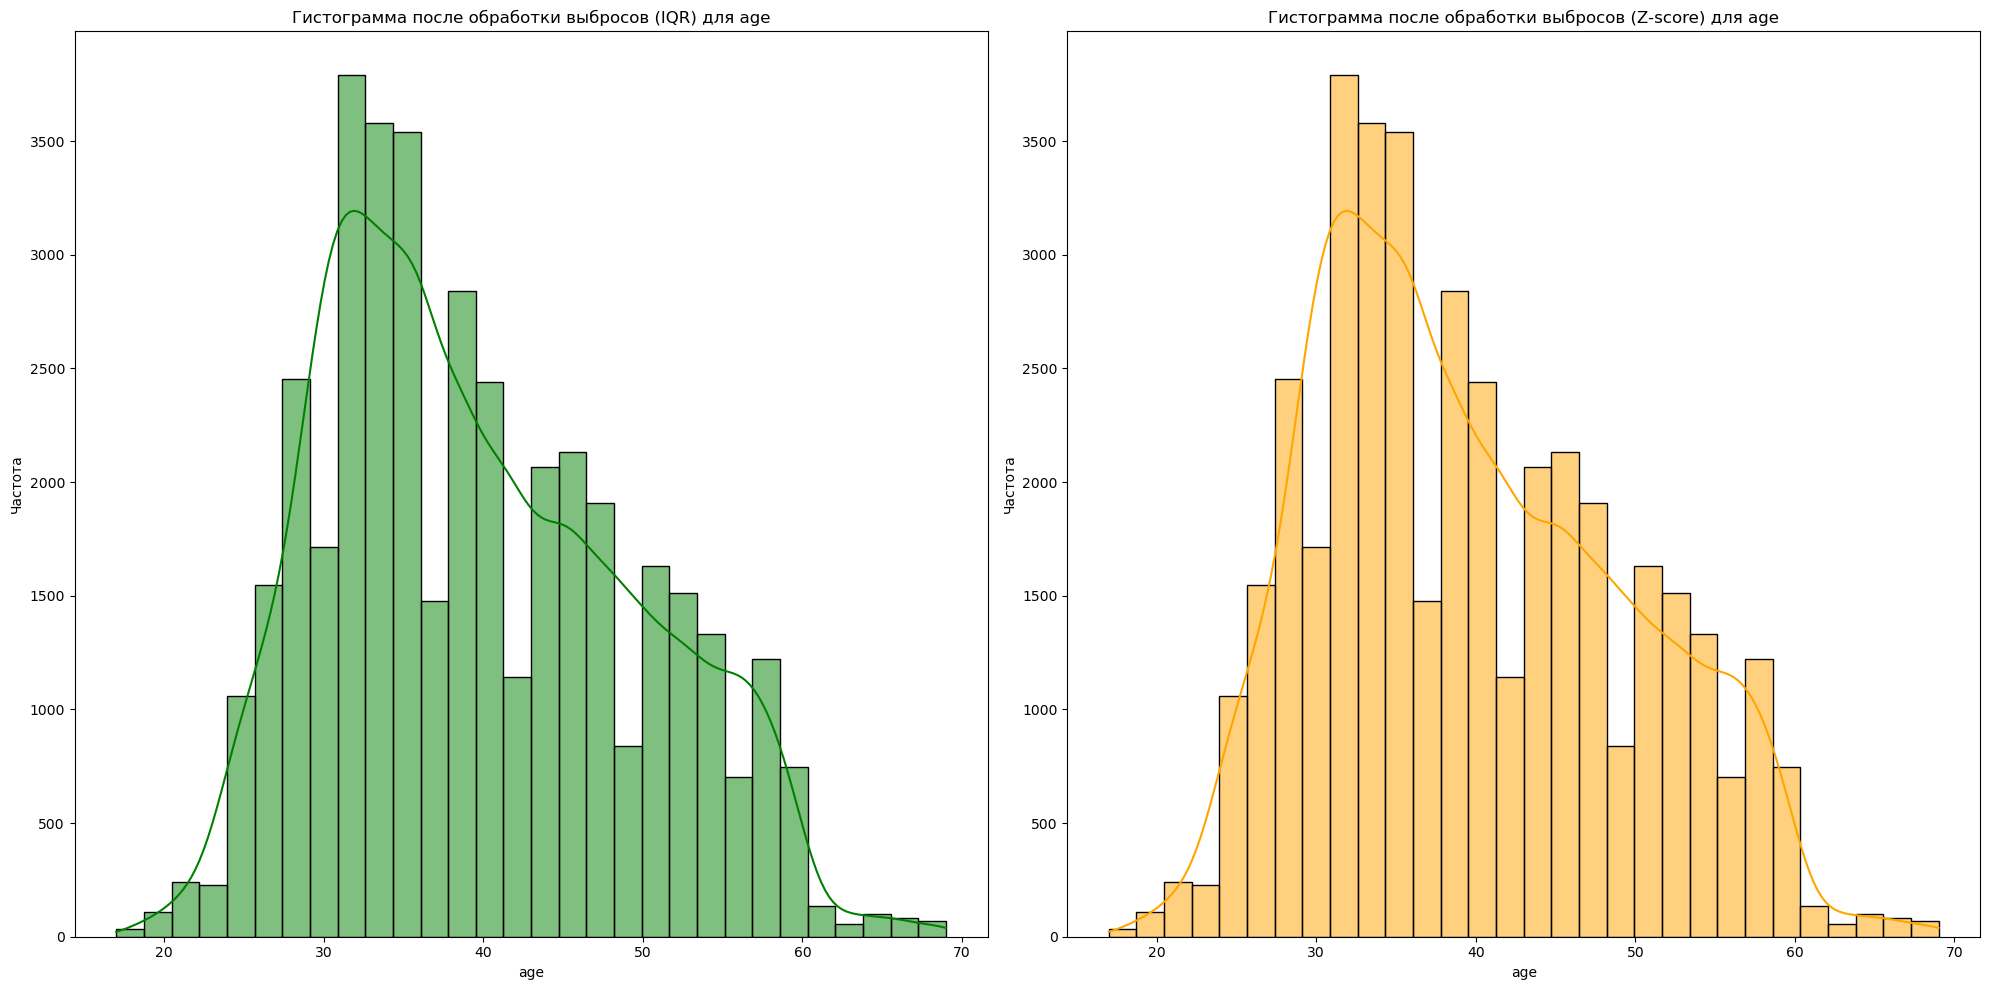

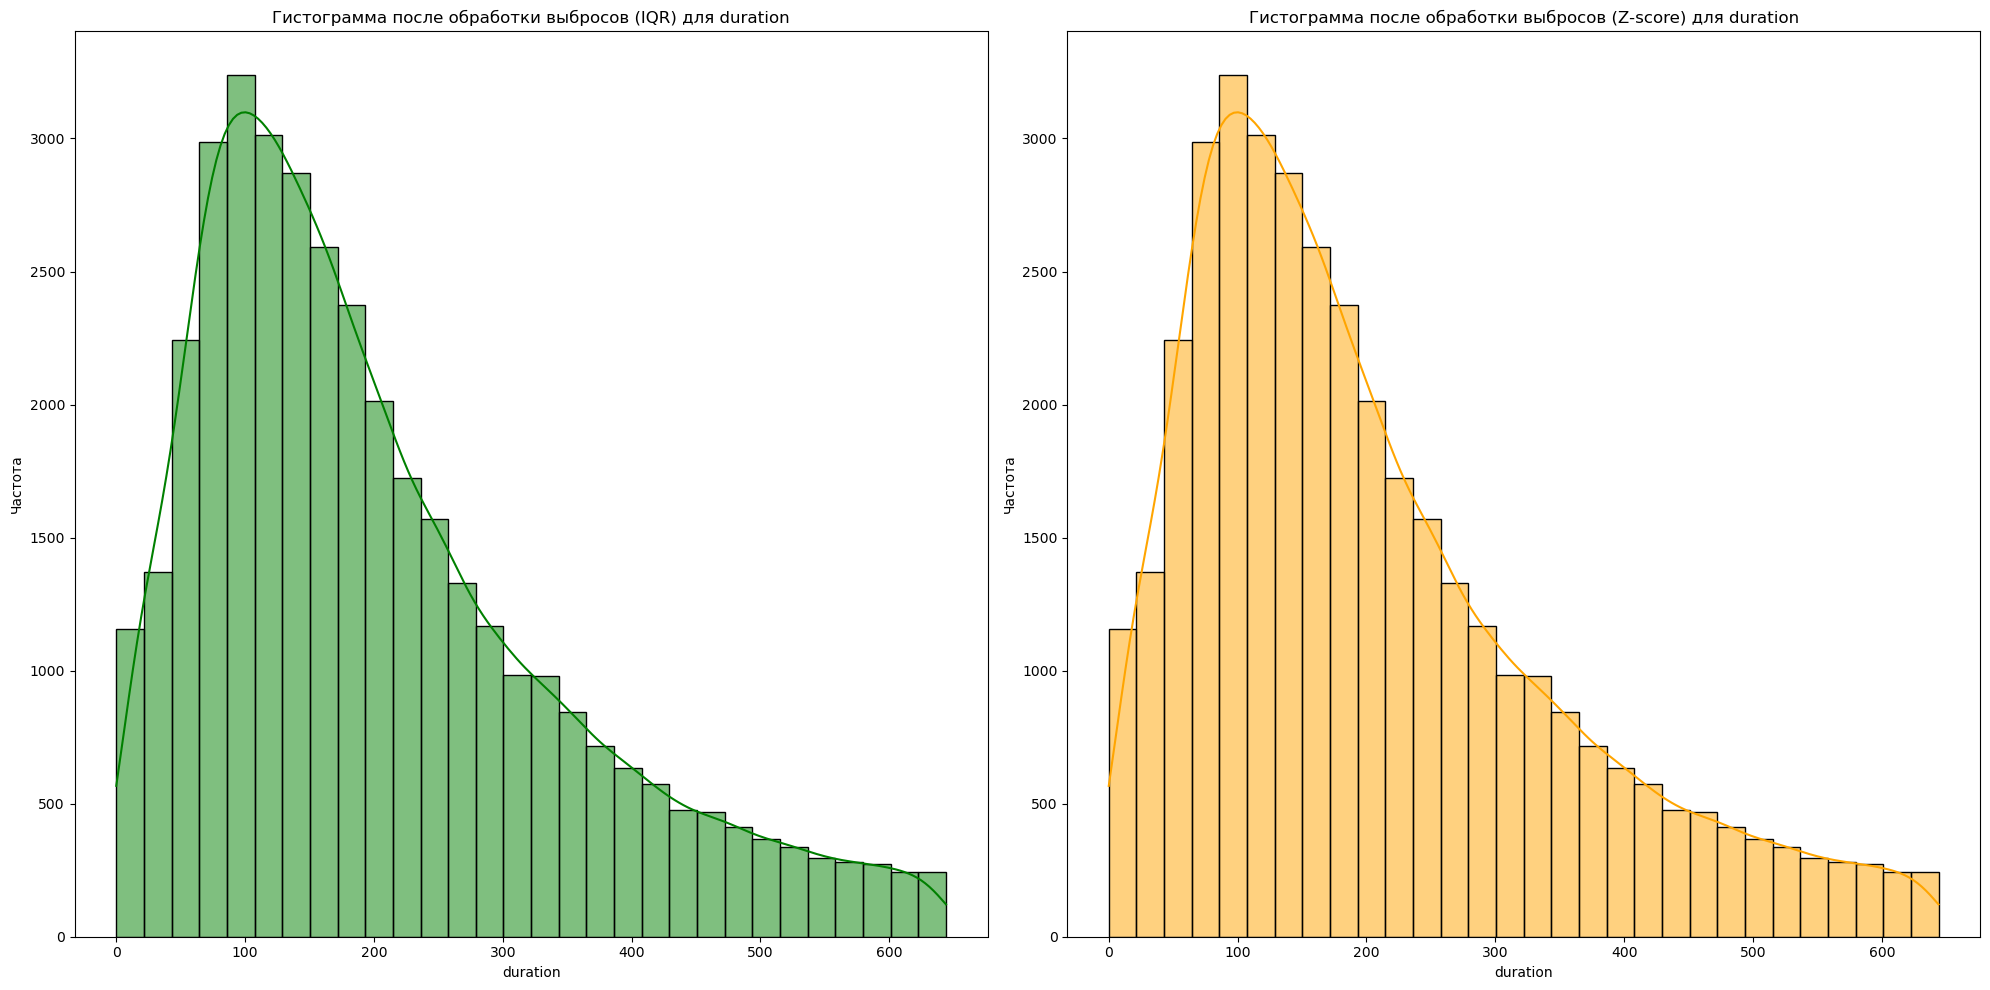

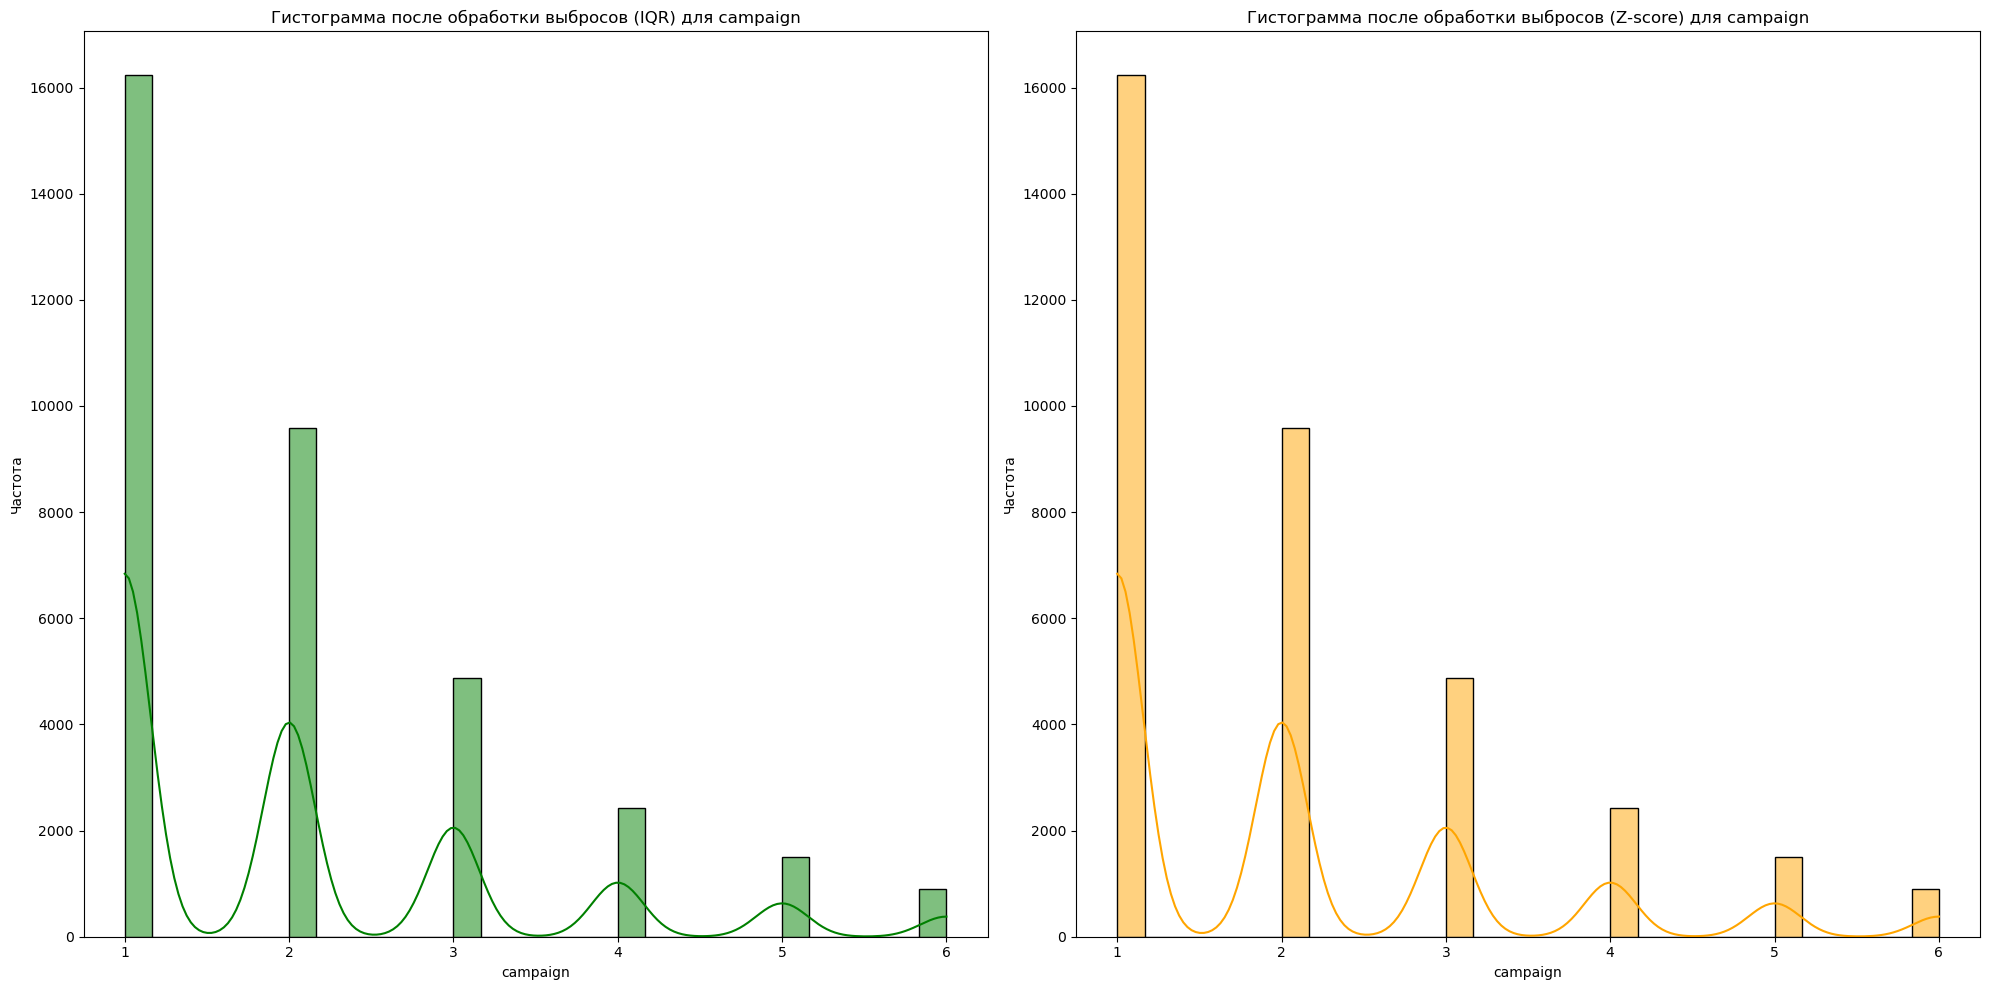

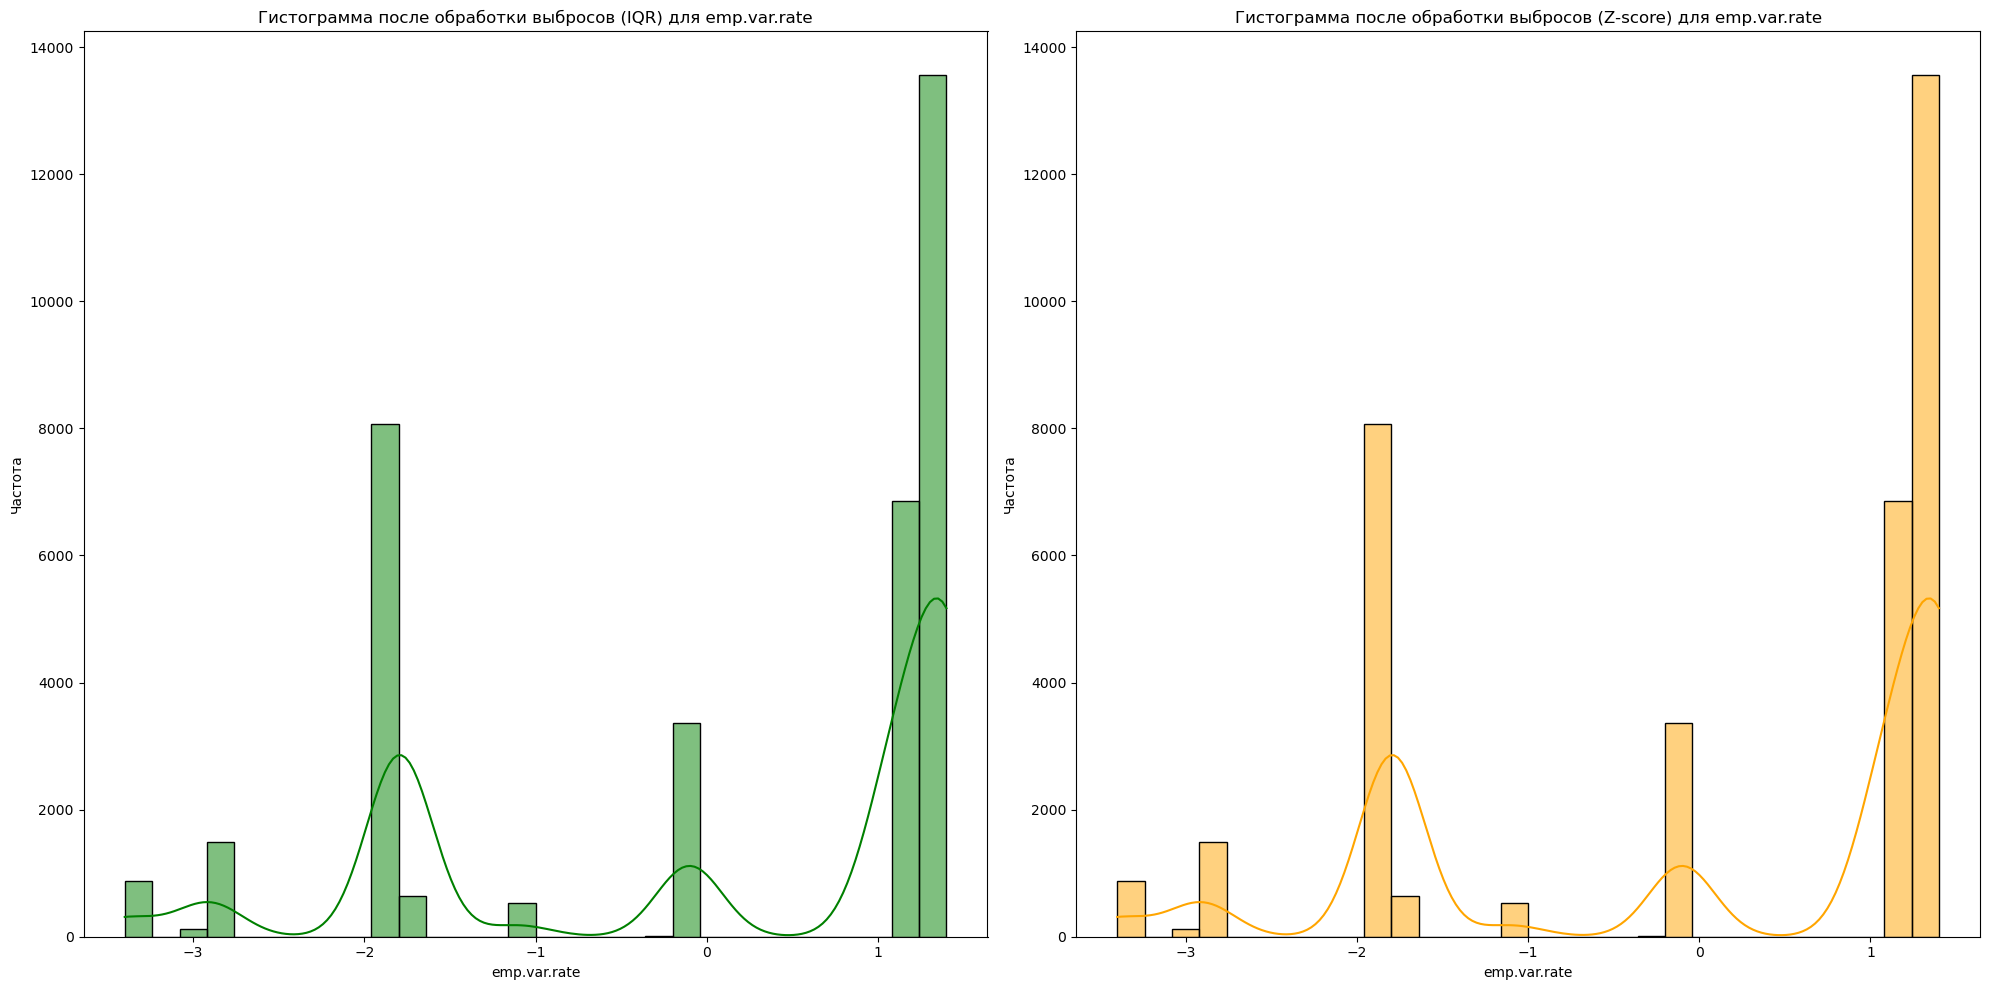

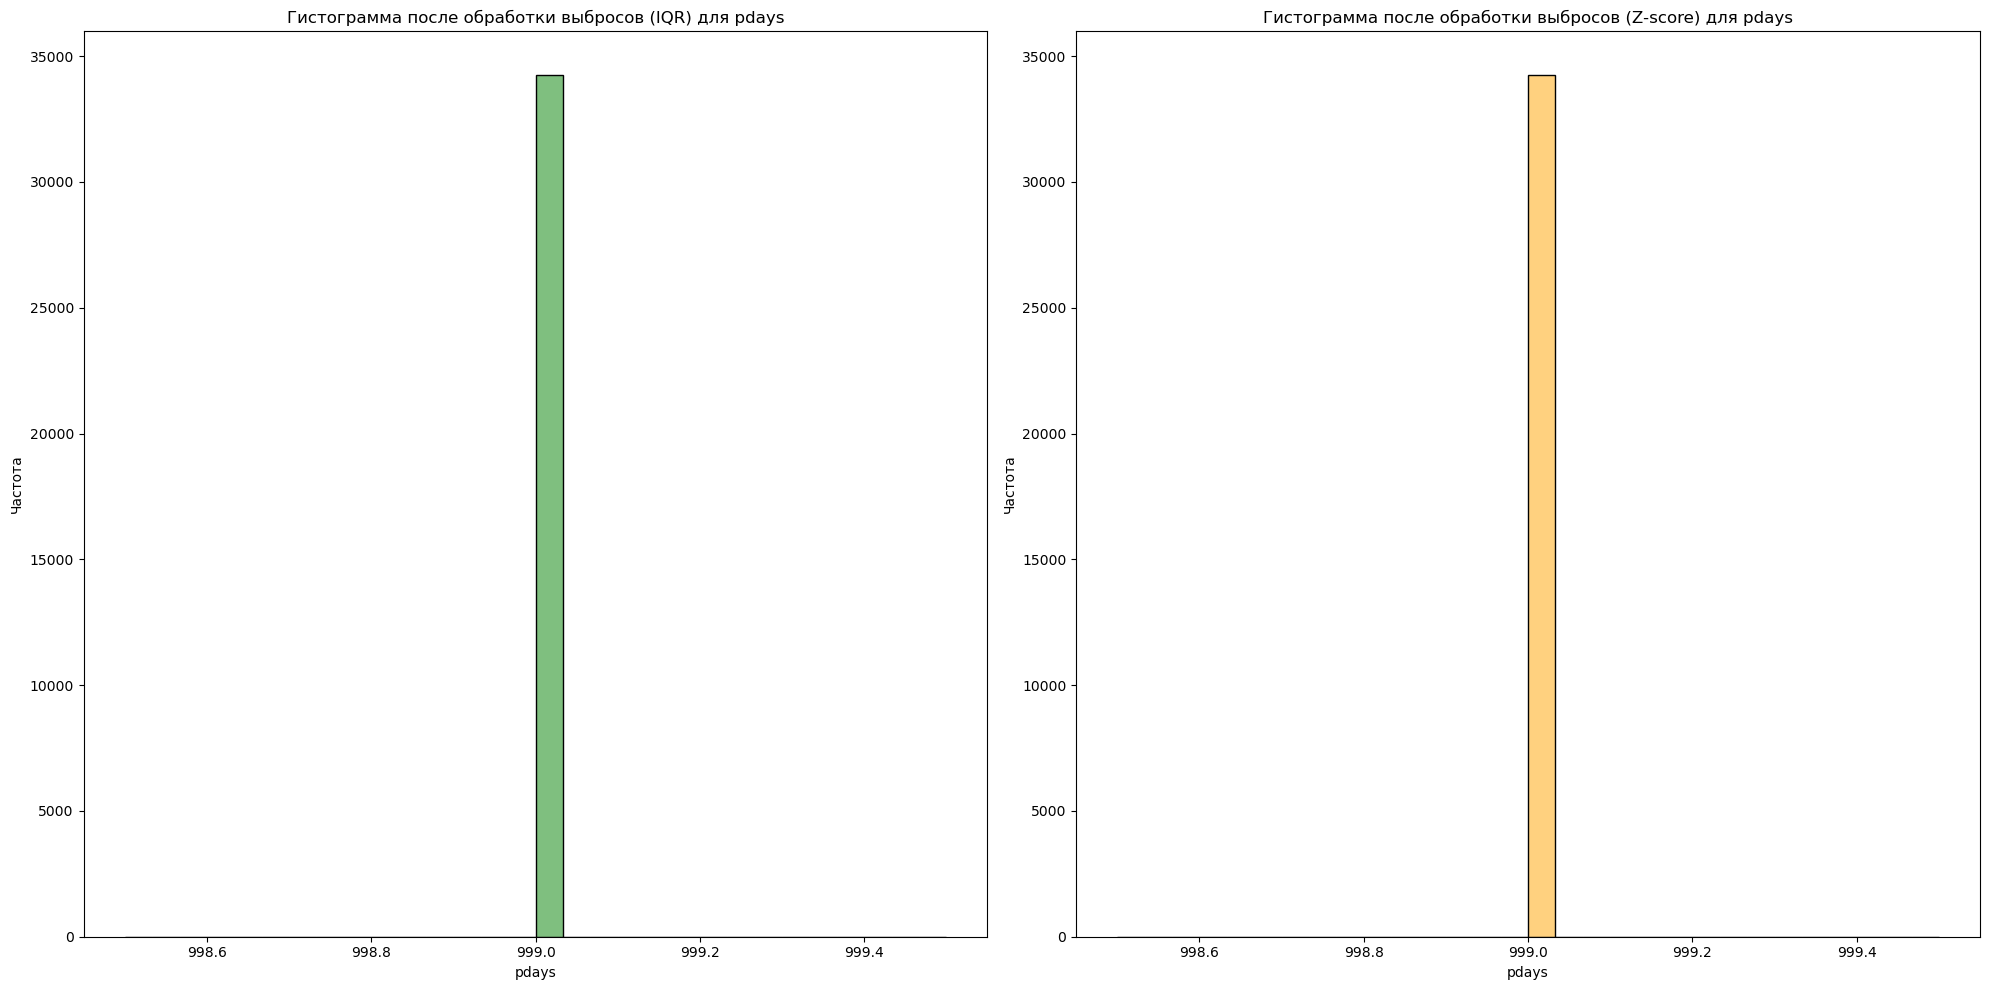

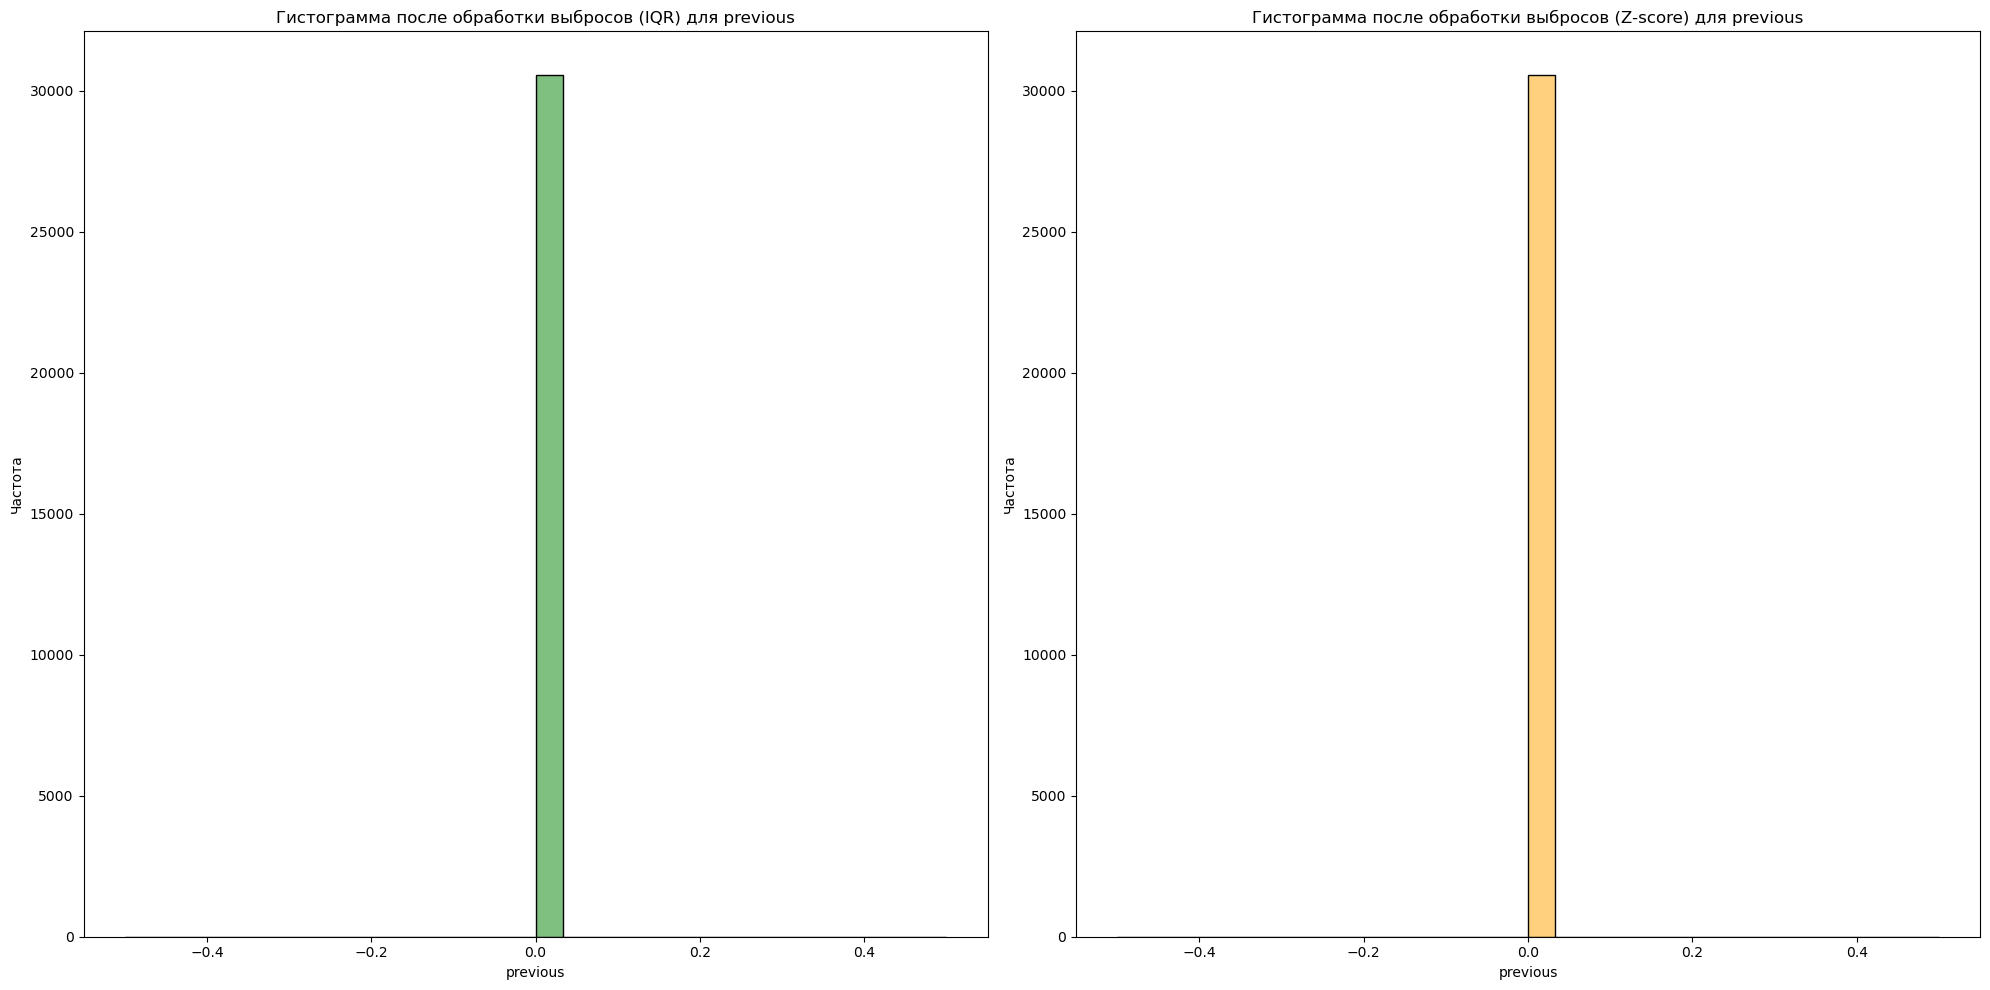

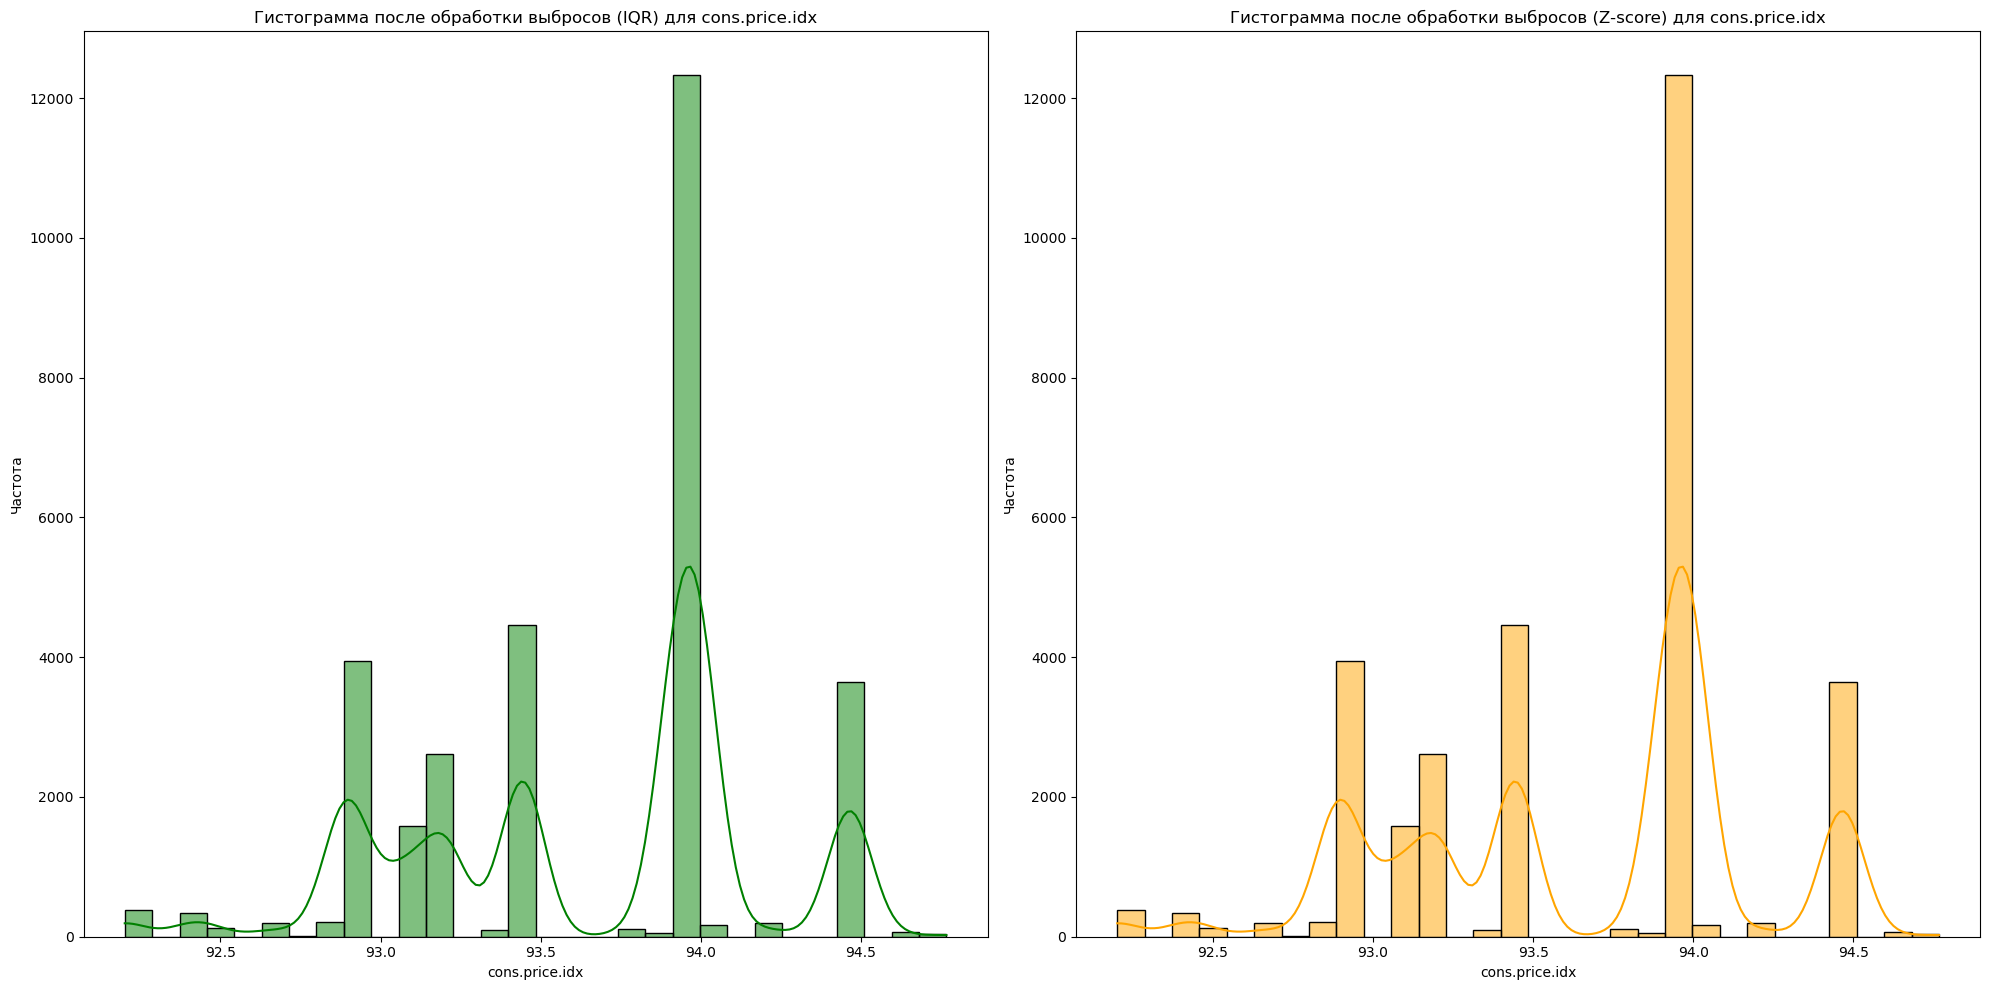

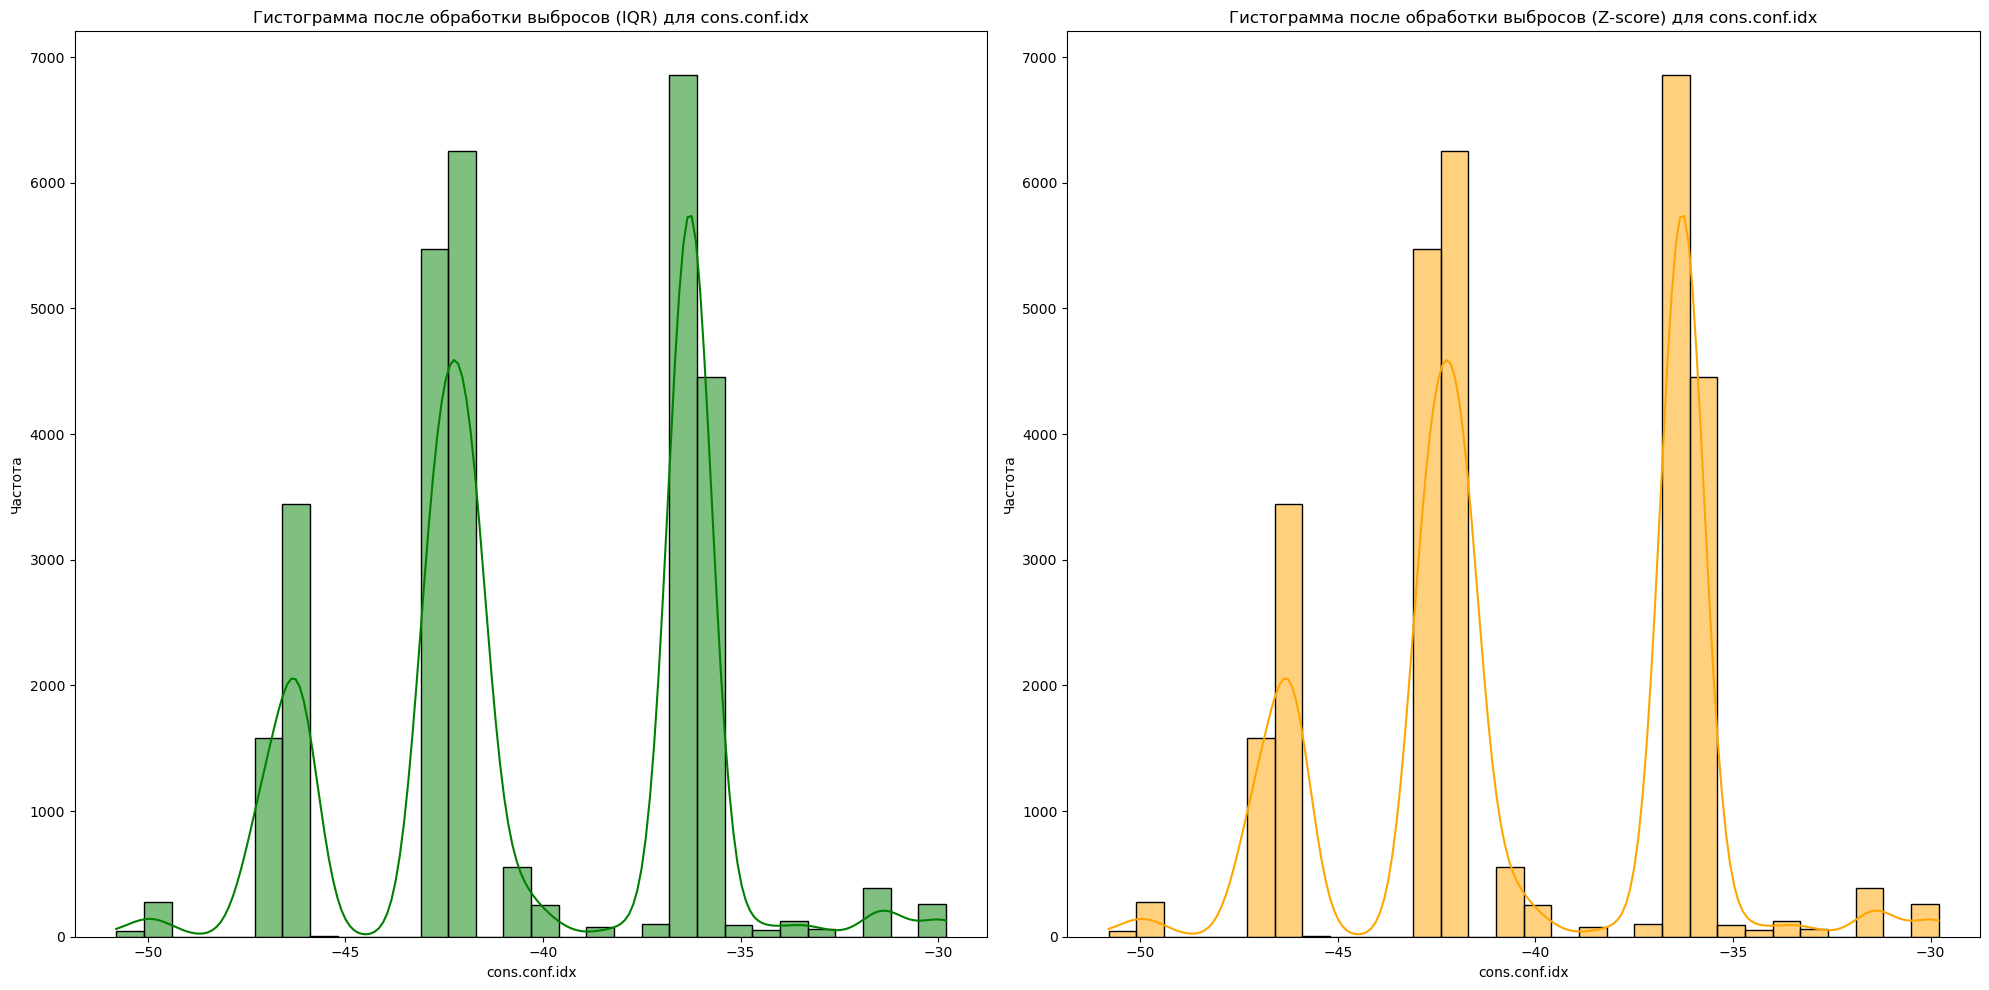

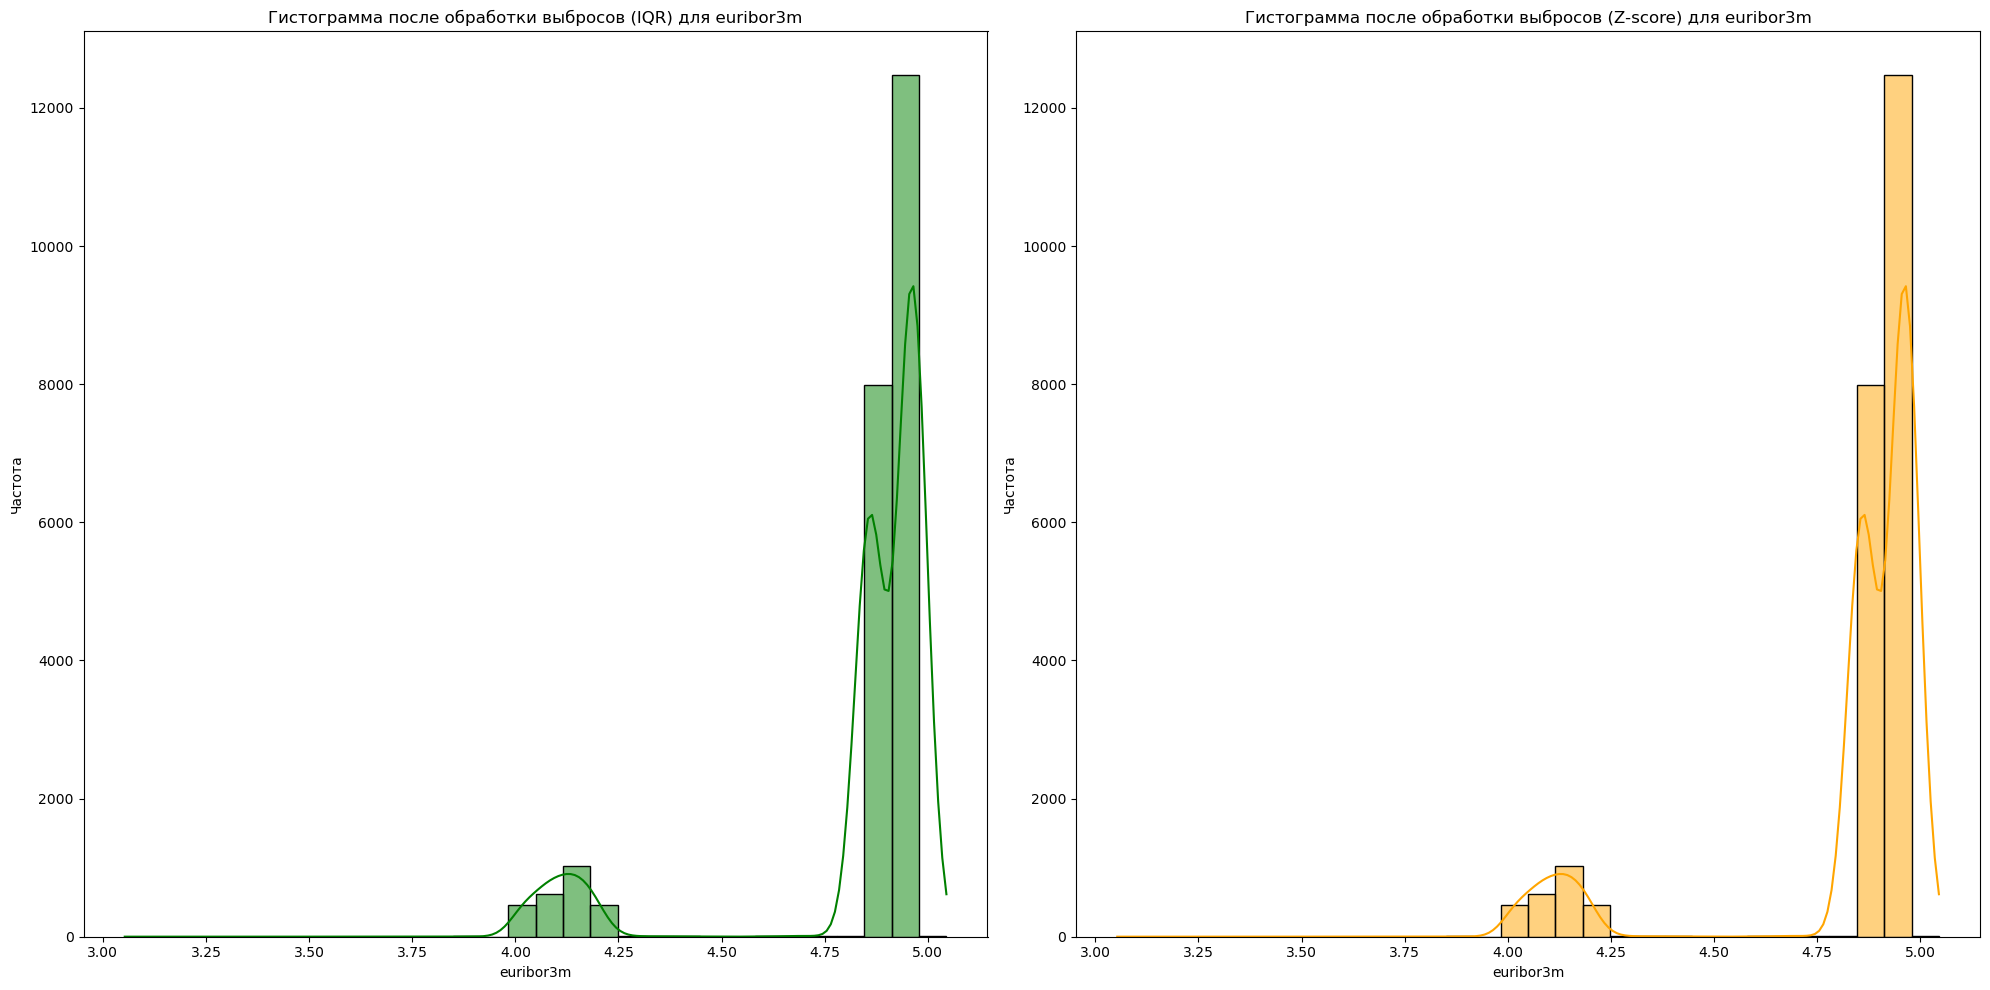

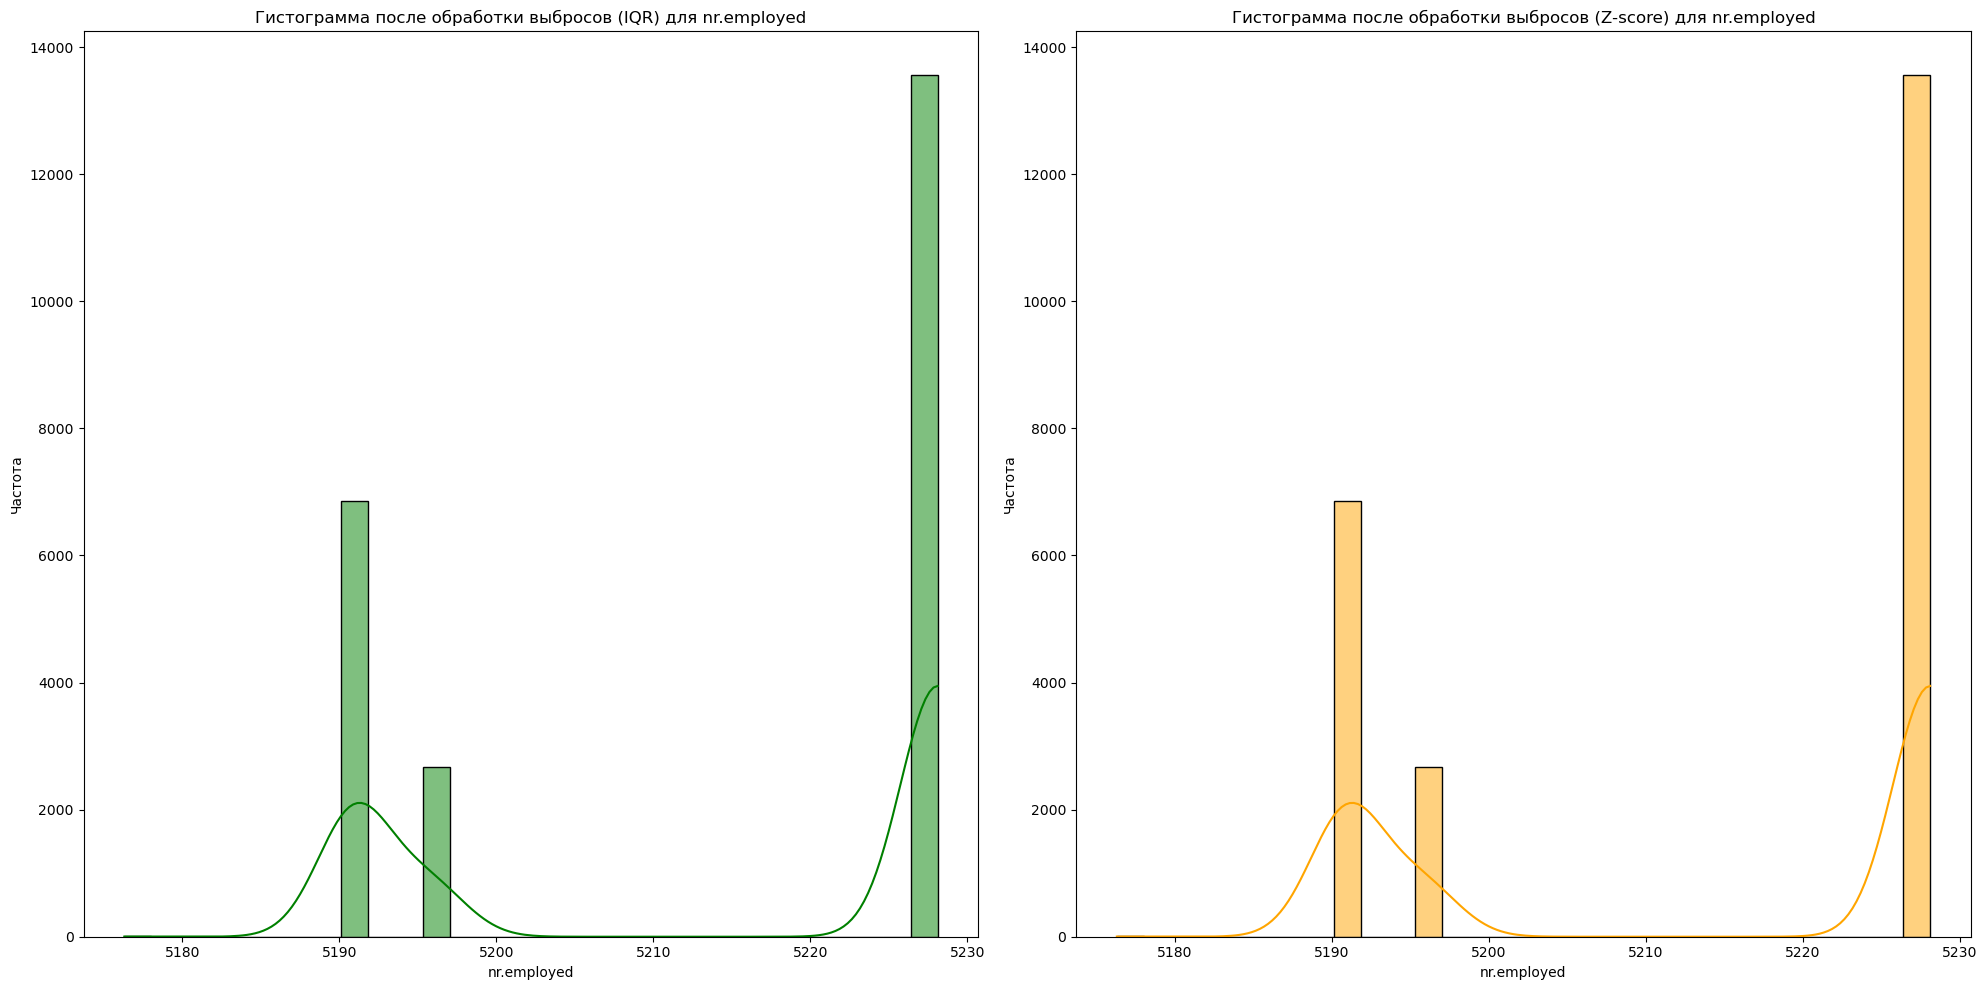

In [180]:
import seaborn as sns

# Функция для поиска выбросов методом IQR
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

# Функция для поиска выбросов методом Z-оценки
def find_outliers_zscore(data, threshold=3):## отправляем маску
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

# Цикл по всем столбцам данных для поиска и удаления выбросов
for column in ['age', 'duration', 'campaign', 'emp.var.rate', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    # Создаем маску для выбросов методом IQR
    outliers_iqr = find_outliers_iqr(df[column])
    # Создаем маску для выбросов методом Z-оценки
    outliers_zscore = find_outliers_zscore(df[column])
    
    # Объединяем маски
    combined_outliers = outliers_iqr | outliers_zscore
    
    # Сохраняем индексы оставшихся данных
    remaining_indices = df[~combined_outliers].index

    # Фильтруем DataFrame, чтобы сохранить только оставшиеся индексы
    df = df.loc[remaining_indices]

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.histplot(df[column], kde=True, ax=axes[0], color='green', bins=30)
    axes[0].set_title(f'Гистограмма после обработки выбросов (IQR) для {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Частота')

    sns.histplot(df[column], kde=True, ax=axes[1], color='orange', bins=30)
    axes[1].set_title(f'Гистограмма после обработки выбросов (Z-score) для {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

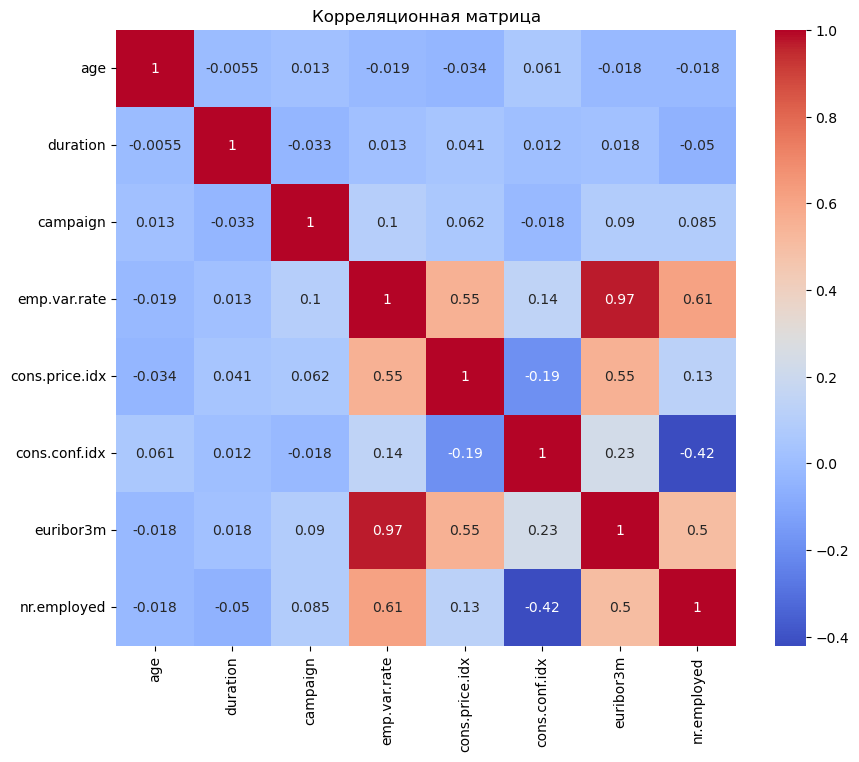

In [181]:
# Вычисляем корреляционную матрицу для выбранных столбцов
correlation = df[['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()

# Создаем фигуру для отображения корреляционной матрицы
plt.figure(figsize=(10, 8))
# Отображаем корреляционную матрицу в виде тепловой карты
sns.heatmap(correlation, annot=True, cmap='coolwarm')
# Устанавливаем заголовок для графика
plt.title('Корреляционная матрица')
# Отображаем график
plt.show()

In [182]:
# Группы по возрасту
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Средняя продолжительность контакта на кампанию
df['avg_duration_per_contact'] = df['duration'] / df['campaign']

# Сезон на основе месяца
df['season'] = df['month'].map({
    'mar': 'spring', 'apr': 'spring', 'may': 'spring',
    'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
    'dec': 'winter', 'jan': 'winter', 'feb': 'winter'
})

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,avg_duration_per_contact,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,p,1.1,93.994,-36.4,4.857,5191.0,no,Senior,261.0,spring
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,149.0,spring
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle,226.0,spring
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle,151.0,spring
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,307.0,spring


In [183]:
# Создаем дамми переменные для указанных столбцов
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 
                                             'contact', 'month', 'day_of_week', 
                                             'poutcome', 'age_group', 'season'])
# Показываем первые 5 строк преобразованного датафрейма
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_nonexistent,poutcome_p,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,no,no,no,261,1,999,0,1.1,93.994,...,False,True,False,False,True,False,False,True,False,False
1,57,no,no,no,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,True,False,False
2,37,no,yes,no,226,1,999,0,1.1,93.994,...,True,False,False,True,False,False,False,True,False,False
3,40,no,no,no,151,1,999,0,1.1,93.994,...,True,False,False,True,False,False,False,True,False,False
4,56,no,no,yes,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,True,False,False


In [184]:
# Преобразование булевых значений в числовые
boolean_like_columns = df_encoded.select_dtypes(include=['bool']).columns
for column in boolean_like_columns:
    df_encoded[column] = df_encoded[column].map({True: 1, False: 0})
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_nonexistent,poutcome_p,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,no,no,no,261,1,999,0,1.1,93.994,...,0,1,0,0,1,0,0,1,0,0
1,57,no,no,no,149,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0
2,37,no,yes,no,226,1,999,0,1.1,93.994,...,1,0,0,1,0,0,0,1,0,0
3,40,no,no,no,151,1,999,0,1.1,93.994,...,1,0,0,1,0,0,0,1,0,0
4,56,no,no,yes,307,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0


In [185]:
# Преобразование бинарных признаков
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    df_encoded[feature] = df[feature].map({'yes': 1, 'no': 0})

df_encoded.head()


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,poutcome_nonexistent,poutcome_p,age_group_Young,age_group_Middle,age_group_Senior,age_group_Elderly,season_autumn,season_spring,season_summer,season_winter
0,56,0,0,0,261,1,999,0,1.1,93.994,...,0,1,0,0,1,0,0,1,0,0
1,57,0,0,0,149,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0
2,37,0,1,0,226,1,999,0,1.1,93.994,...,1,0,0,1,0,0,0,1,0,0
3,40,0,0,0,151,1,999,0,1.1,93.994,...,1,0,0,1,0,0,0,1,0,0
4,56,0,0,1,307,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,1,0,0


In [186]:
# Проверка на наличие пропущенных значений
print(df_encoded.isnull().sum().sum())
# Проверка типов данных
print(df_encoded.dtypes)

0
age                                int64
default                            int64
housing                            int64
loan                               int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
avg_duration_per_contact         float64
job_admin.                         int64
job_blue-collar                    int64
job_entrepreneur                   int64
job_housemaid                      int64
job_management                     int64
job_retired                        int64
job_self-employed                  int64
job_services                       int64
job_student                        int64
job_technician

In [187]:
# Корреляция с целевой переменной
correlation_with_y = df_encoded.corr()['y'].sort_values(ascending=False)
print(correlation_with_y.head(10))  
print(correlation_with_y.tail(10))  

y                              1.000000
duration                       0.258290
month_oct                      0.244083
avg_duration_per_contact       0.203192
season_autumn                  0.061651
month_nov                      0.023333
contact_cellular               0.023056
education_university.degree    0.019627
job_student                    0.017195
season_winter                  0.014268
Name: y, dtype: float64
education_basic.9y   -0.012028
month_jun            -0.013308
contact_telephone    -0.023056
cons.conf.idx        -0.029554
cons.price.idx       -0.035171
emp.var.rate         -0.049477
month_may            -0.050210
season_spring        -0.050210
pdays                      NaN
previous                   NaN
Name: y, dtype: float64


In [188]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)  
y = df_encoded['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Missing values:
age                              0
default                          0
housing                          0
loan                             0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
avg_duration_per_contact         0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced                 0
marital_married                  0
marital_single                   0
educ

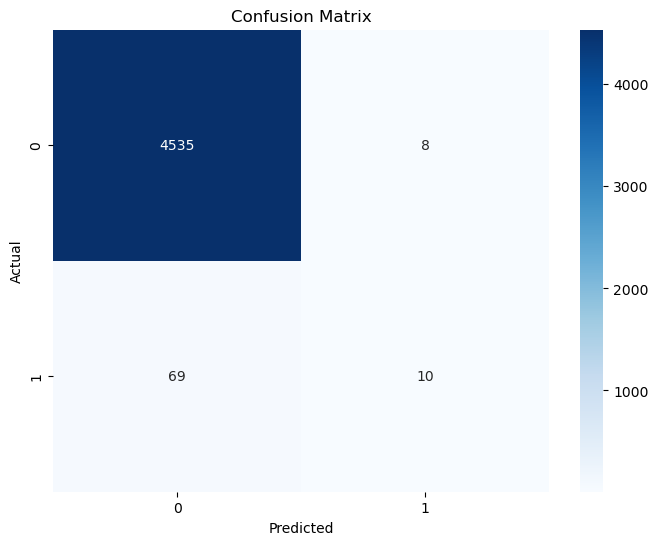


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4543
           1       0.56      0.13      0.21        79

    accuracy                           0.98      4622
   macro avg       0.77      0.56      0.60      4622
weighted avg       0.98      0.98      0.98      4622


Cross-validation scores: [0.98404111 0.98322965 0.98268867 0.98214769 0.98349567]
Mean CV score: 0.9831


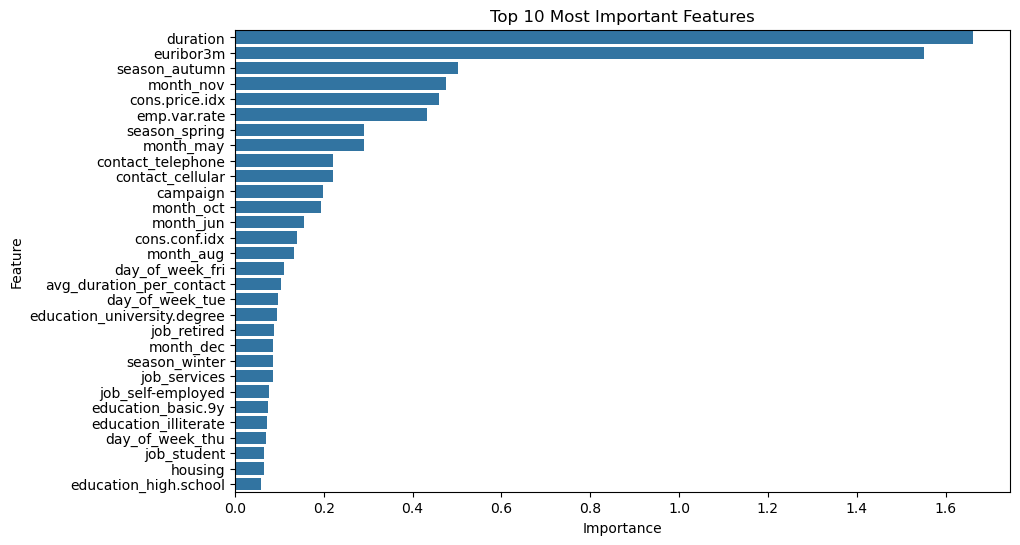

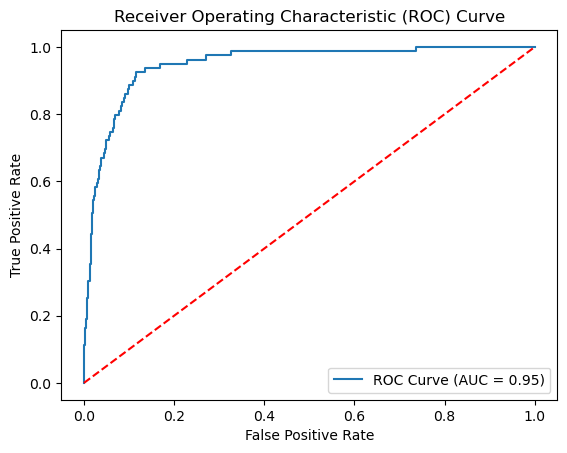

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Создание DataFrame для удобства манипуляции данными
df = pd.DataFrame(X, columns=X.columns)
df['target'] = y

# Предобработка данных
# Проверка на наличие пропущенных значений
print("Missing values:")
print(df.isnull().sum())

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели логистической регрессии
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_lr.predict(X_test_scaled)
probabilities = model_lr.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for the positive class
auc_roc = roc_auc_score(y_test, probabilities)

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Отображение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Отображение отчета о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Кросс-валидация
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Важность признаков
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model_lr.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Decision Tree Accuracy: 0.9730


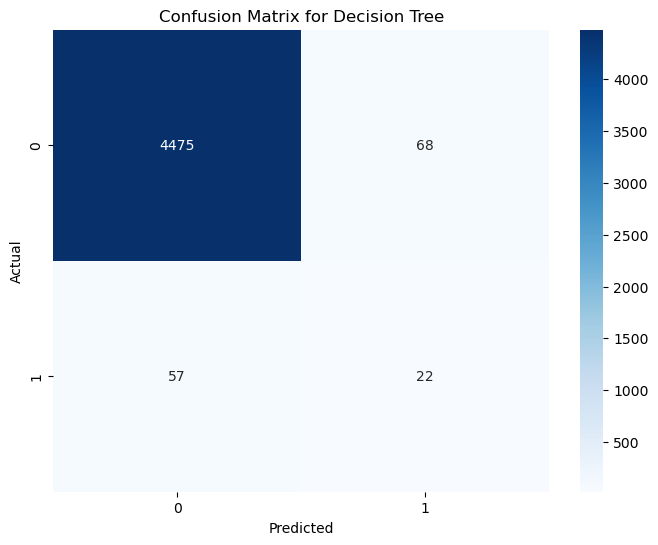


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4543
           1       0.24      0.28      0.26        79

    accuracy                           0.97      4622
   macro avg       0.62      0.63      0.62      4622
weighted avg       0.97      0.97      0.97      4622



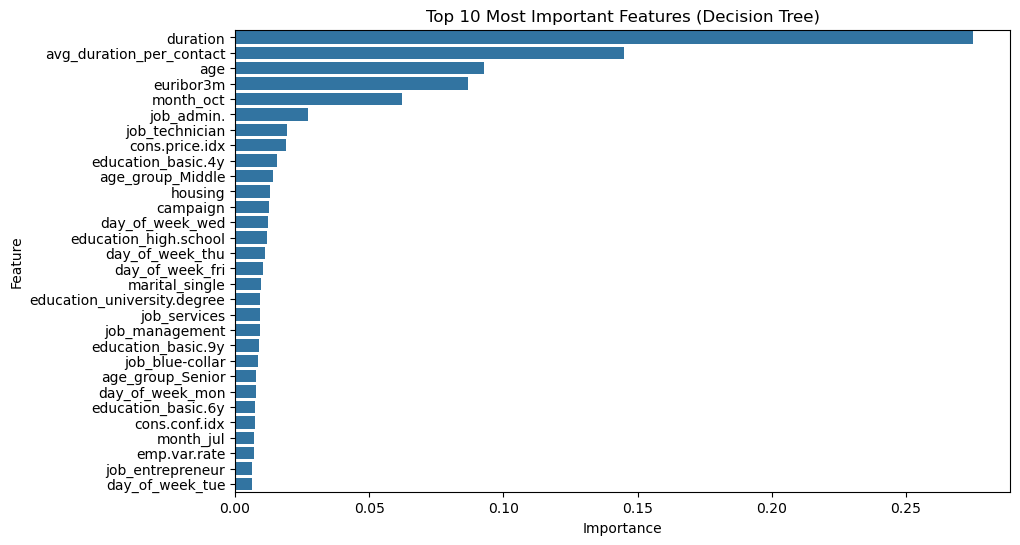

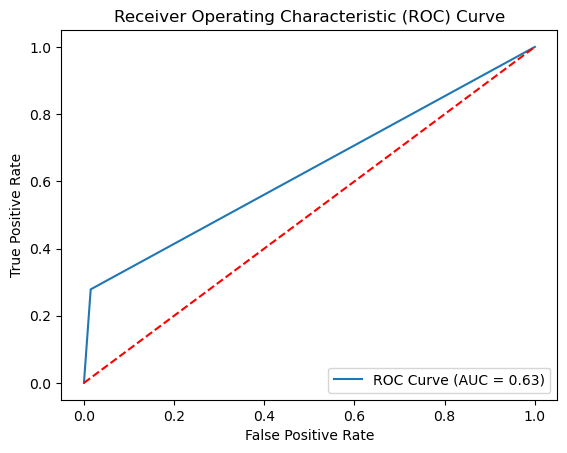

In [190]:
from sklearn.tree import DecisionTreeClassifier

# Обучение модели дерева решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  

# Прогнозирование на тестовой выборке
y_pred_dt = dt_model.predict(X_test)
probabilities = dt_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Вычисление точности
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Отображение матрицы ошибок для дерева решений
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Отображение отчета о классификации для дерева решений
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Важность признаков для дерева решений
feature_importance_dt = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_dt.head(30))
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Random Forest Accuracy: 0.9853


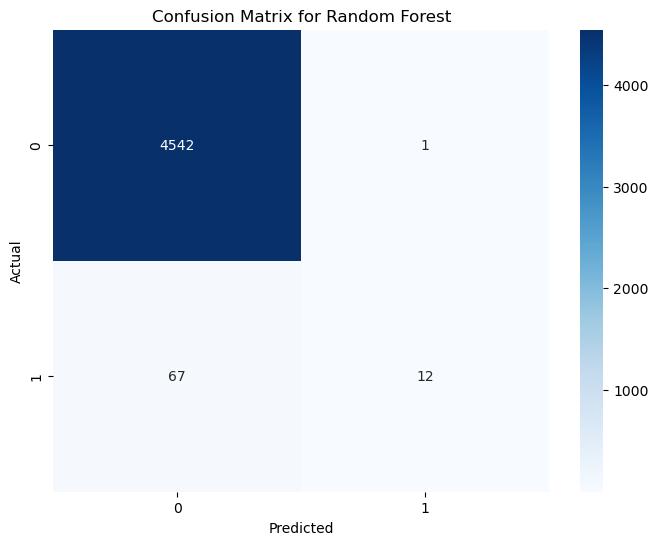


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4543
           1       0.92      0.15      0.26        79

    accuracy                           0.99      4622
   macro avg       0.95      0.58      0.63      4622
weighted avg       0.98      0.99      0.98      4622



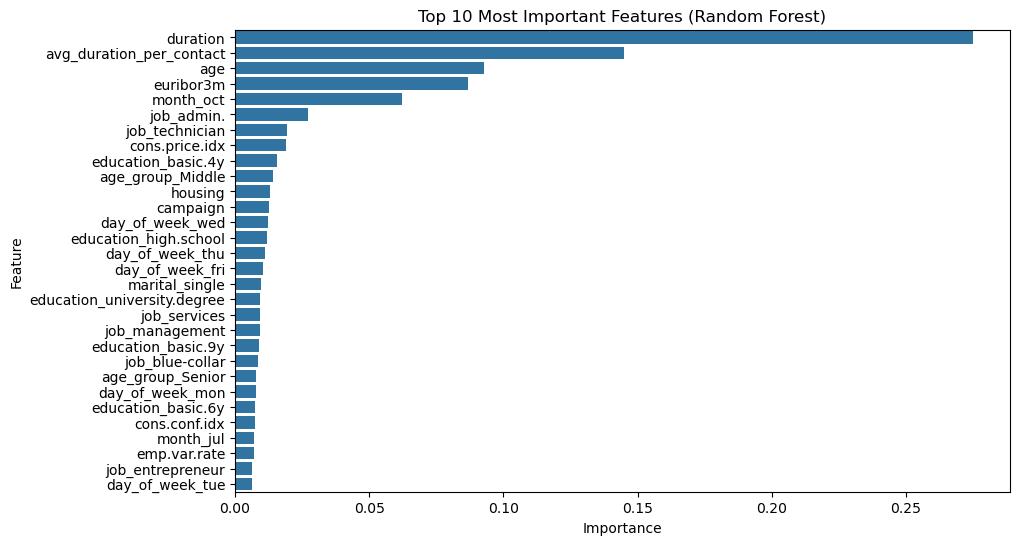

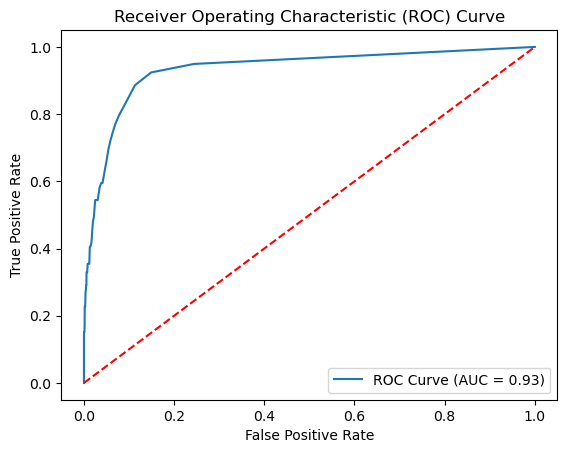

In [191]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_jobs=1)
rf_model.fit(X_train, y_train)  

# Прогнозирование на тестовой выборке
y_pred_rf = rf_model.predict(X_test)
probabilities = rf_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Вычисление точности
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_dt.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf.head(30))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Gradient Boosting Accuracy: 0.9818


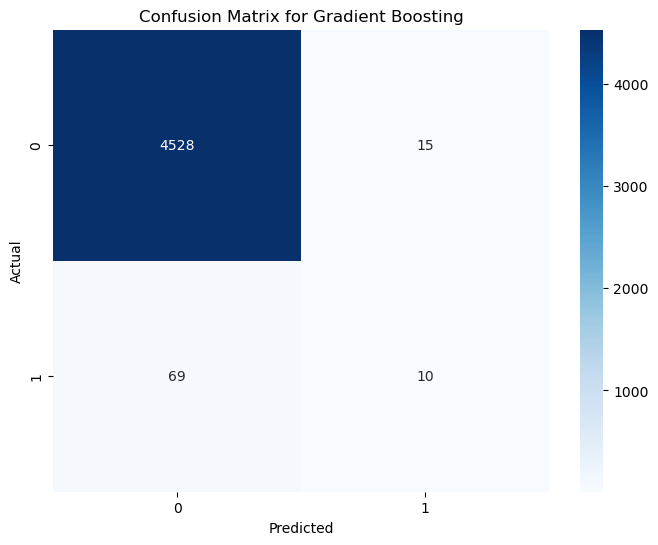


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4543
           1       0.40      0.13      0.19        79

    accuracy                           0.98      4622
   macro avg       0.69      0.56      0.59      4622
weighted avg       0.97      0.98      0.98      4622



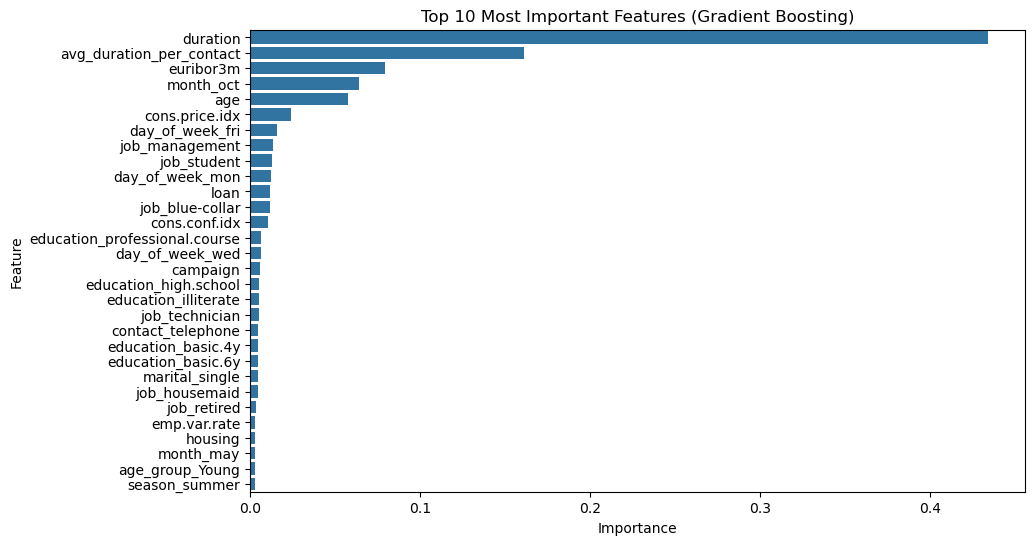

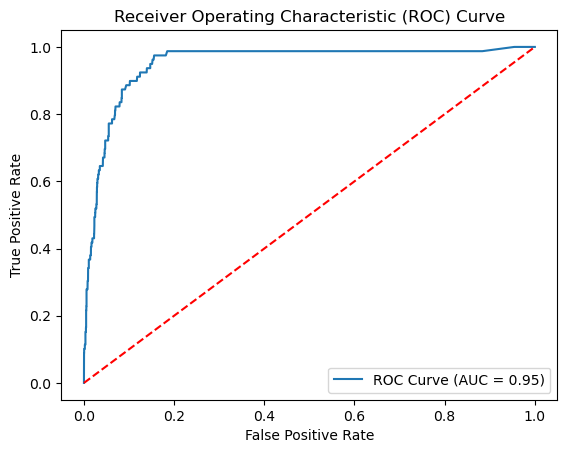

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train) 

# Прогнозирование на тестовой выборке
y_pred_gb = gb_model.predict(X_test)
probabilities = gb_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Вычисление точности
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

feature_importance_gb = pd.DataFrame({'feature': X.columns, 'importance': gb_model.feature_importances_})
feature_importance_gb = feature_importance_gb.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_gb.head(30))
plt.title('Top 10 Most Important Features (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

SVM Accuracy: 0.9838


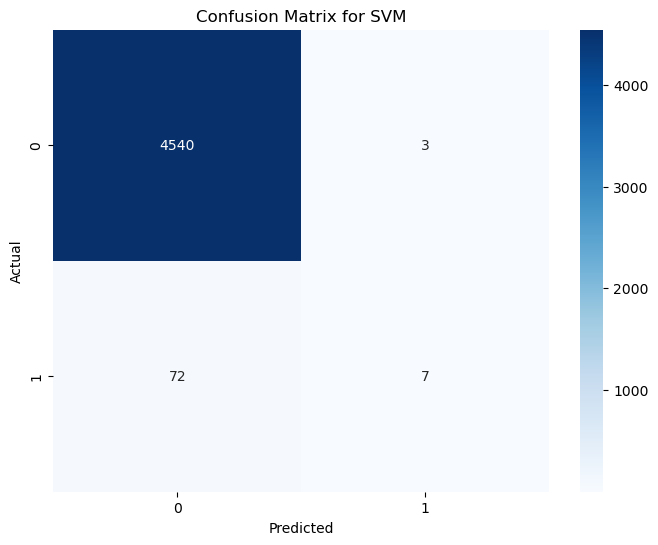


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4543
           1       0.70      0.09      0.16        79

    accuracy                           0.98      4622
   macro avg       0.84      0.54      0.57      4622
weighted avg       0.98      0.98      0.98      4622



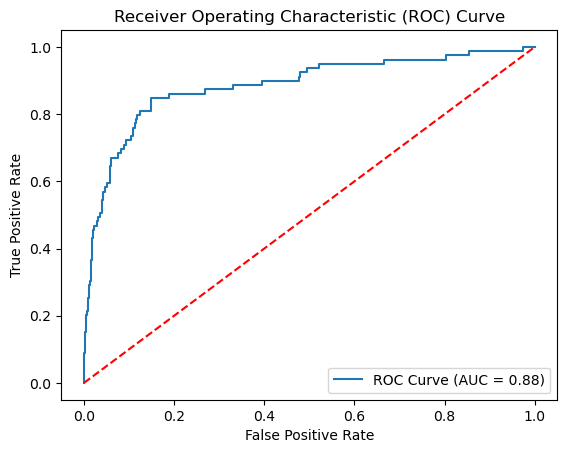

In [193]:
# Обучение модели SVM
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = svm.SVC(kernel='rbf', C=1.0, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Прогнозирование и оценка
y_pred_svm = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)

# Вычисление точности
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

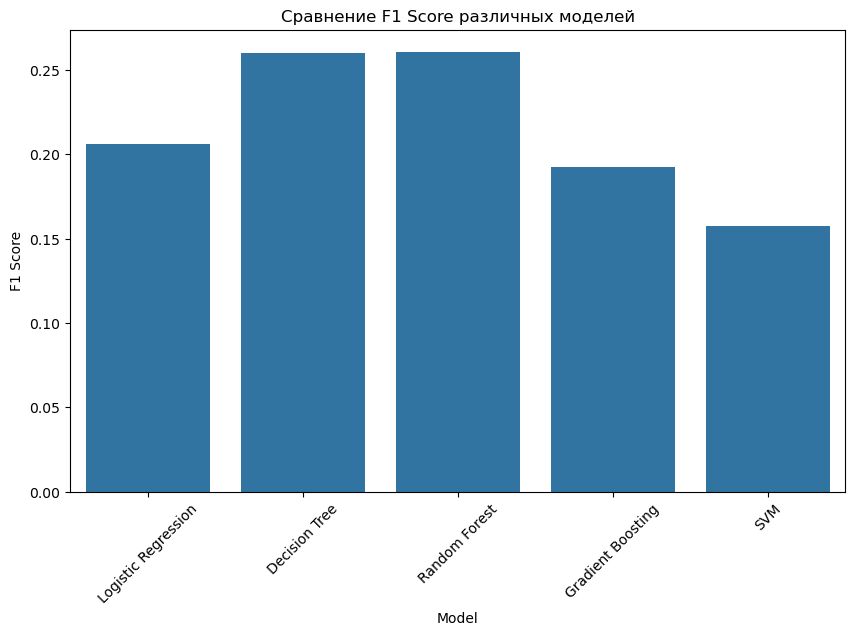

In [194]:
# Сравнение моделей
from sklearn.metrics import f1_score

results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_svm],
    'F1 Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf), 
                  f1_score(y_test, y_pred_gb), f1_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('Сравнение F1 Score различных моделей')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.show()

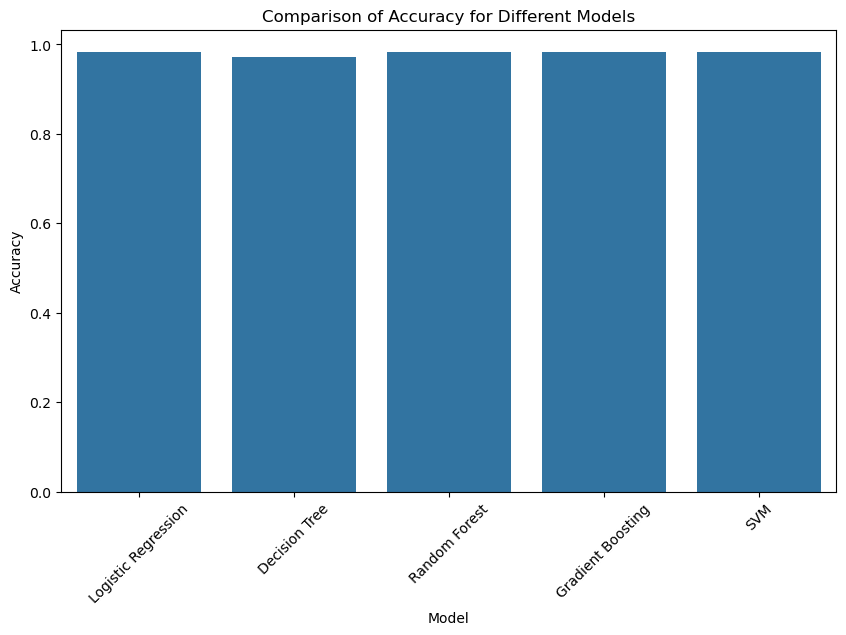

,Model,Accuracy
2,Random Forest,0.983770
4,SVM,0.983337
0,Logistic Regression,0.983283
3,Gradient Boosting,0.982742
1,Decision Tree,0.971435


In [195]:
# Кросс-валидация для различных моделей
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = [model_lr, dt_model, rf_model, gb_model, svm_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
results = []

def perform_cross_validation(model, X, y, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    
    results.append(np.mean(scores))

for model in models:
    perform_cross_validation(model, X_train_scaled, y_train)

results_df = pd.DataFrame({'Model': model_names, 'Accuracy': results})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparison of Accuracy for Different Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

results_df.sort_values(by='Accuracy', ascending=False)[['Model', 'Accuracy']]

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Определение параметров для поиска для модели Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [None, 10],   
    'min_samples_split': [2, 5]
}

# Определение параметров для поиска для модели SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01],
    'kernel': ['rbf']
}

# Применение PCA для уменьшения размерности данных
pca = PCA(n_components=10) 
X_train_reduced = pca.fit_transform(X_train_scaled)

# Поиск лучших параметров для модели Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='f1', n_jobs=1)
rf_grid_search.fit(X_train_reduced, y_train)

# Поиск лучших параметров для модели SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=3, scoring='f1', n_jobs=1)
svm_grid_search.fit(X_train_reduced, y_train)

print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print(f"Best F1 Score: {rf_grid_search.best_score_:.4f}")

print("\nBest parameters for SVM:")
print(svm_grid_search.best_params_)
print(f"Best F1 Score: {svm_grid_search.best_score_:.4f}")


Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.1079

Best parameters for SVM:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 Score: 0.1678
